# Sample, uma amostra bem representativa

In [68]:
import pandas as pd
import numpy as np

In [69]:
# Desativar avisos de expiração
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [70]:
    # Solicitar entrada do usuário para o intervalo de confiança
    while True:
        try:
            entrada = input("Digite um valor, pressione [Enter] para usar o padrão 10.000: ")
            if entrada == "":
                usar = 10000
            else:
                usar = int(entrada)
            break
        except ValueError:
            print("conferir outras possibilidades")


Digite um valor, pressione [Enter] para usar o padrão 10.000: 


In [71]:
entrada

''

In [72]:
usar

10000

In [73]:
# Gerando dados para o DataFrame
data = {
    'Descritiva1': np.random.choice(['A', 'B', 'C', 'D'], usar),
    'Descritiva2': np.random.choice(['X', 'Y', 'Z'], usar),
    'Descritiva3': np.random.choice(['G', 'H', 'I'], usar),
    'Numerica1': np.random.normal(0, 1, usar),
    'Numerica2': np.random.normal(10, 2, usar),
    'Numerica3': np.random.randint(1, 100, usar)
}

# Criando o DataFrame
df = pd.DataFrame(data)


In [74]:
df.head(3)

,Descritiva1,Descritiva2,Descritiva3,Numerica1,Numerica2,Numerica3
0,C,X,H,0.724018,5.365021,54
1,B,Z,G,1.762234,8.800809,11
2,C,Y,H,-0.388015,9.428903,48


In [75]:
df.tail(3)

,Descritiva1,Descritiva2,Descritiva3,Numerica1,Numerica2,Numerica3
9997,C,Y,I,1.002785,7.416143,93
9998,B,Y,G,1.304121,9.145530,88
9999,B,Z,G,0.853678,9.495423,70


In [77]:
# Ajustando o tamanho da amostra para a base de dados completa
sample_size = int(usar*0.10)-5  # Tamanho da amostra

# Amostrando as colunas descritivas mantendo a proporção
sampled_df = df.groupby(['Descritiva1', 'Descritiva2', 'Descritiva3']).apply(lambda x: x.sample(frac=sample_size/len(df))).reset_index(drop=True)

# Verificando o tamanho da amostra selecionada
sampled_size = len(sampled_df)
print("Tamanho da amostra:", sampled_size)

# Amostrando as colunas numéricas
numerical_cols = ['Numerica1', 'Numerica2', 'Numerica3']
for col in numerical_cols:
    sampled_df[col] = df[col].sample(n=sample_size, replace=True).values[:sampled_size]  # Usando o tamanho da amostra selecionada

# Verificando novamente o tamanho da amostra
print("Tamanho da amostra após amostragem numérica:", len(sampled_df))


Tamanho da amostra: 996


ValueError: Length of values (995) does not match length of index (996)

In [78]:
sampled_df

,Descritiva1,Descritiva2,Descritiva3,Numerica1,Numerica2,Numerica3
0,A,X,G,-0.084378,9.372096,36
1,A,X,G,-1.223756,9.413519,80
2,A,X,G,-1.103880,10.150901,17
3,A,X,G,-0.033353,6.737635,82
4,A,X,G,-0.540114,9.024980,52
...,...,...,...,...,...,...
991,D,Z,I,0.271908,11.242592,35
992,D,Z,I,-0.257955,6.674601,58
993,D,Z,I,1.207165,11.496954,32
994,D,Z,I,0.901775,10.795947,10


In [79]:
Resumo_df=df.groupby(['Descritiva1', 'Descritiva2', 'Descritiva3']).count().reset_index()

In [80]:
Resumo_df.head(3)

,Descritiva1,Descritiva2,Descritiva3,Numerica1,Numerica2,Numerica3
0,A,X,G,249,249,249
1,A,X,H,258,258,258
2,A,X,I,293,293,293


In [81]:
print('O dataframe tem ',df.shape[0],' registros e ',df.shape[1],' colunas.')

O dataframe tem  10000  registros e  6  colunas.


In [82]:
print('O dataframe de amostra tem ',sampled_df.shape[0],' registros e ',sampled_df.shape[1],' colunas.')

O dataframe de amostra tem  996  registros e  6  colunas.


In [83]:
import seaborn as sns

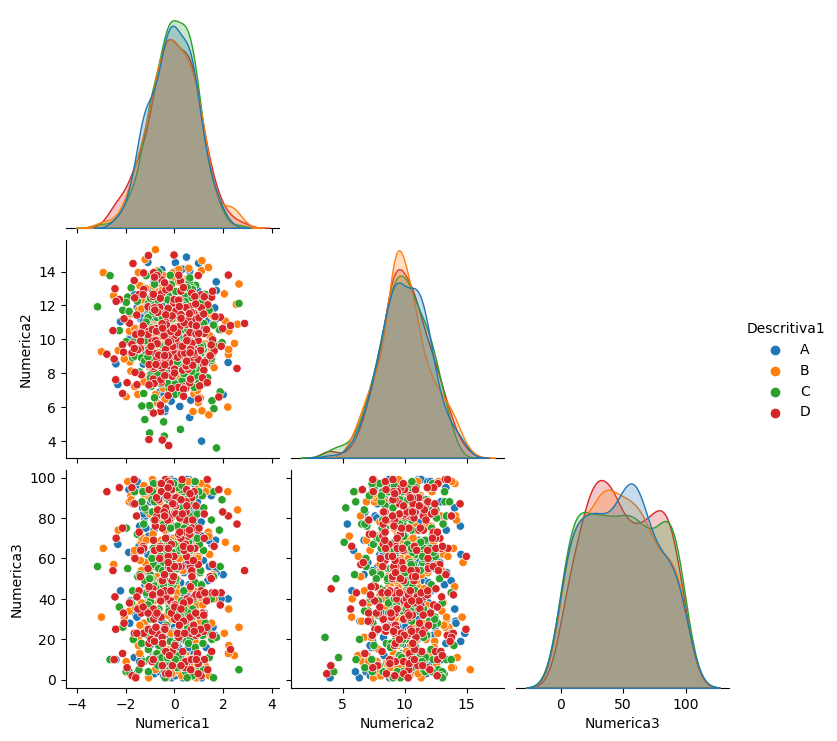

In [84]:
sns.pairplot(sampled_df, hue='Descritiva1', corner=True)